In [15]:
import numpy as np
import matplotlib.pyplot as plt
import plotfancy as pf

In [16]:
a = np.load('FD_samples.npz')
noise = a['noise']
modif = noise**2

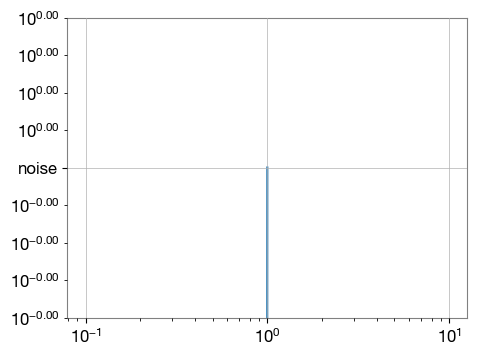

In [17]:
fig, ax1 = pf.create_plot()
ax1.loglog(a)

In [87]:
from gwpy.timeseries import TimeSeries

strain = TimeSeries.fetch_open_data('H1', 1126259447, 1126285311)
psd = strain.psd(fftlength=16, overlap=8, window='tukey')

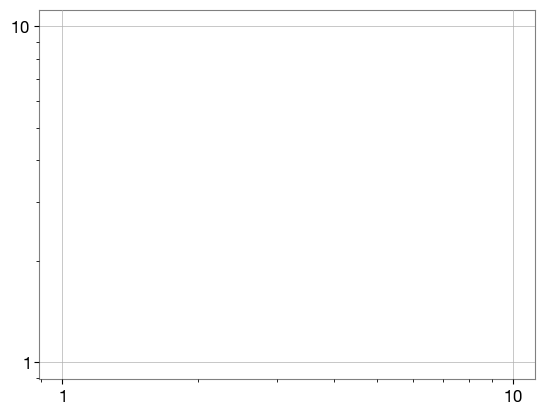

In [20]:
import numpy as np
from scipy.signal import convolve

# Moving average window size
window_size = 10

# Create boxcar kernel (sums to 1)
kernel = np.ones(window_size) / window_size

# Convolve with 'same' mode to keep output size same as input
x_smooth = convolve(psd, kernel, mode='same')
plt.loglog(x_smooth)

In [21]:
psd

<FrequencySeries([nan, nan, nan, ..., nan, nan, nan]
                 unit=Unit("1 / Hz"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.0625 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=1126259447.0>,
                 name='Strain',
                 channel=None)>

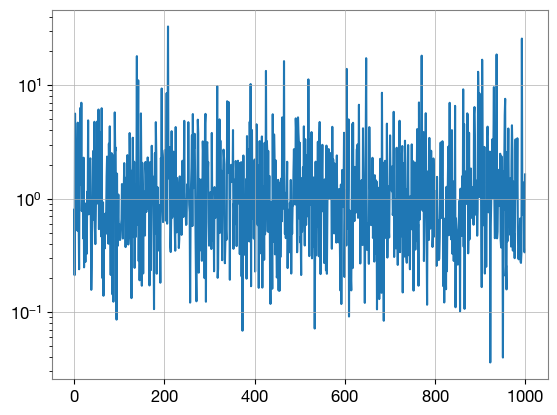

In [36]:
Nbins=1000
grid = np.linspace(1, 1024, Nbins)
plt.plot(np.random.lognormal(0,1,size=np.shape(grid)))
plt.yscale('log')

In [41]:
import torch
np.shape(torch.linspace(1, 1024, Nbins).unsqueeze(0))

torch.Size([1, 1000])

In [12]:
a['noise']

array([[-6.48067395e-05, -5.26050546e-05, -2.06208827e-05, ...,
         5.48262223e-10,  6.23797220e-10,  6.52648359e-10],
       [ 6.39771232e-05,  5.15638883e-05,  1.91637493e-05, ...,
        -1.50236166e-10, -2.23249117e-10, -2.51141656e-10],
       [-5.81222559e-05, -4.68602207e-05, -1.74000086e-05, ...,
        -6.42553210e-11, -5.45869353e-10, -7.29862741e-10],
       ...,
       [ 1.25816408e-05,  9.51907013e-06,  1.89462380e-06, ...,
        -6.18948381e-11, -2.55218290e-10, -3.29093260e-10],
       [-1.82173594e-06, -4.22529024e-07,  2.95198270e-06, ...,
         2.72496099e-12, -2.63089858e-10, -3.64642485e-10],
       [ 6.05974340e-06,  5.87434088e-06,  4.98153010e-06, ...,
         2.96770956e-10,  4.21826671e-10,  4.69599214e-10]],
      shape=(6000, 8193))

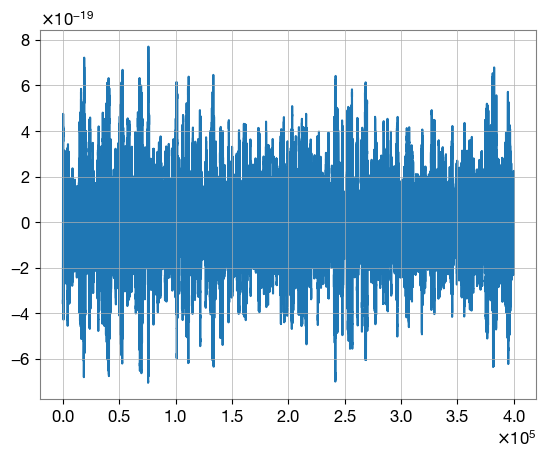

In [88]:
import scipy
import scipy.signal
a = np.array(strain[5938:405938])
s = np.std(a)
m = np.average(a)
out = a*(np.abs(a)<(m+5*s))
# psd = scipy.signal.welch(a,window='tukey', nperseg=16, noverlap=8, fs=1/strain.dt)
psd = scipy.signal.welch(a, nperseg=4096, noverlap=8,fs=float(1/strain.dt.value))
np.savez('base_psd', psd=psd,out=out)


plt.plot(a)

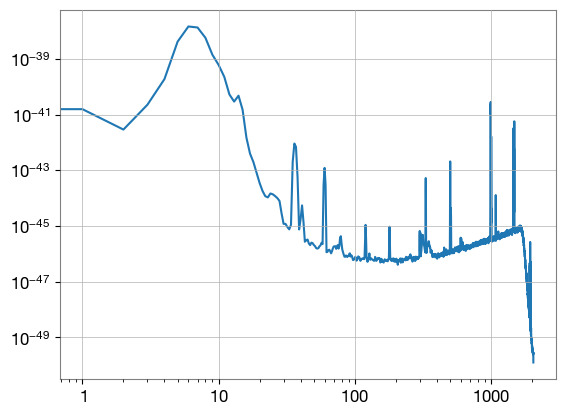

In [89]:
plt.loglog(psd[0], psd[1])

In [83]:
1/strain.dt.value

np.float64(4096.0)